In [1]:
import numpy as np
import pandas as pd
from ast import literal_eval
import json

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
models_ran = [
    'LC_discrete_attention',
    'change_d_obs_fk',
    #'change_d_obs_cause_effect',
    #'change_d_obs_cause',
    'LC_discrete',
    'normative',
    'ces_strength',
    'ces_no_strength'
]

file_tags = [
    ['att', 'att_prior'],
    ['att_cha', 'att_cha_prior'],
    #['att_cha'],
    #['att_cha'],
    [1, 'prior'],
    [1, 'prior'],
    ['str_guess'],
    ['guess']
]

model_labels = [
    ['LC w. attention', 'LC w. attention w. prior'],
    ['Change w. full knowledge', 'Change w. full knowledge w. prior'],
    #['Change linear cause effect'],
    #['Change linear cause'],
    ['LC basic', 'LC basic w. prior'],
    ['normative', 'normative w. prior'],
    ['CES strength sensitive'],
    ['CES basic']
]

model_names = []
for names in model_labels:
    model_names += names

color_dict = {
    'LC w. attention': tuple(sns.light_palette("seagreen")[-1]), 
    'LC w. attention w. prior': tuple(sns.light_palette("seagreen")[-2]),
    'Change w. full knowledge': tuple(sns.color_palette("mako")[1]), 
    'Change w. full knowledge w. prior': tuple(sns.color_palette("mako")[2]),
    'Change linear cause effect': tuple(sns.color_palette("mako")[3]),
    'Change linear cause': tuple(sns.color_palette("mako")[4]),
    'LC basic': tuple(sns.color_palette("Paired")[5]),
    'LC basic w. prior': tuple(sns.color_palette("Paired")[4]),
    'normative': tuple(sns.color_palette("Set2")[-3]), 
    'normative w. prior': tuple(sns.color_palette("Paired")[-2]),
    'CES strength sensitive': tuple(sns.color_palette("YlOrBr")[4]),
    'CES basic': tuple(sns.color_palette("YlOrBr")[3]),
    'Baseline': tuple(sns.color_palette("Set2")[-1])
}
# CES prior : sns.color_palette("YlOrBr").as_hex()[3]
# CES strength insensitive: sns.color_palette("YlOrBr").as_hex()[2]

## Dictionary for color allocation
def gen_colors(labels, color_dict):
    return [color_dict[label] for label in labels]



In [3]:
def compute_group_bic(nLL, tag):
    num_params = 1 if tag == 1 else len(tag.split('_'))
    return nLL * 2 + np.log(1203) * (1 + num_params)

# Import datasets
df = pd.DataFrame()
for i, model in enumerate(models_ran):
    for j, tag in enumerate(file_tags[i]):
        if df.empty:
            df = pd.read_csv(f'./data/params_fitting_outputs/{model}/summary_fit_{tag}.csv')
            df = df.replace([model], [model_labels[i][j]])
            df['tag'] = tag
            df['folder'] = model
    
        else:
            df_2 = pd.read_csv(f'./data/params_fitting_outputs/{model}/summary_fit_{tag}.csv')
            df_2 = df_2.replace([model], [model_labels[i][j]])
            df_2['tag'] = tag
            df_2['folder'] = model
            df = pd.concat([df, df_2], axis=0, ignore_index=True)


experiments_series = df_2.experiment.to_list()
#df = df.drop(['Unnamed: 0'], axis=1)

df_group = pd.DataFrame()
for i, model in enumerate(models_ran): 
    for j, tag in enumerate(file_tags[i]):

        if df_group.empty:
            df_group = pd.read_csv(f'./data/group_params_fitting_outputs/{model}_summary_fit_{tag}.csv')
            df_group = df_group.replace([model], [model_labels[i][j]])
            df_group['tag'] = tag
            df_group['folder'] = model
    
        else:
            df_2 = pd.read_csv(f'./data/group_params_fitting_outputs/{model}_summary_fit_{tag}.csv')
            df_2 = df_2.replace([model], [model_labels[i][j]])
            df_2['tag'] = tag
            df_2['folder'] = model
            df_group = pd.concat([df_group, df_2], axis=0, ignore_index=True)

df_group['bic'] = df_group.apply(lambda x: compute_group_bic(x.nLL, x.tag), axis=1)

baseline_group = -2 * (302 *4) * np.log(1/5**6)
baseline_group

df_group.loc[len(df_group.index), ['model_name', 'bic']] = ['Baseline', baseline_group]
pids = df.pid.unique()
df_group.model_name.unique()

array(['LC w. attention', 'LC w. attention w. prior',
       'Change w. full knowledge', 'Change w. full knowledge w. prior',
       'LC basic', 'LC basic w. prior', 'normative', 'normative w. prior',
       'CES strength sensitive', 'CES basic', 'Baseline'], dtype=object)

In [4]:
print(f'Number of lost trials: {df.bic.isna().sum()} out of {df.shape[0]}')
print(f'Number of not completely successful optimisation: {(df.success == False).sum()} out of {df.shape[0]}')

Number of lost trials: 5 out of 3020
Number of not completely successful optimisation: 5 out of 3020


In [5]:




df_group

,pid,experiment,num_trials,model_name,nLL,bic,params,params_labels,success,message,time,tag,folder
0,NaN,"['experiment_1', 'experiment_2', 'experiment_3']",NaN,LC w. attention,9075.064500,18164.314147,[1.83151202 0.45661586],"[['smoothing', 0], ['decay_rate', 1]]",True,Optimization terminated successfully.,182.188640,att,LC_discrete_attention
1,NaN,"['experiment_1', 'experiment_2', 'experiment_3']",NaN,LC w. attention w. prior,8888.912758,17799.103237,[ 1.84362866 0.61732498 160.70682808],"[['smoothing', 0], ['decay_rate', 1], ['prior_...",True,Optimization terminated successfully.,176.230751,att_prior,LC_discrete_attention
2,NaN,"['experiment_1', 'experiment_2', 'experiment_3']",NaN,Change w. full knowledge,9290.135922,18601.549565,[1.94835896 0.34538549 0.31420306],"[['smoothing', 0], ['decay_rate', 1], ['change...",True,Optimization terminated successfully.,182.267259,att_cha,change_d_obs_fk
3,NaN,"['experiment_1', 'experiment_2', 'experiment_3']",NaN,Change w. full knowledge w. prior,9191.242190,18410.854675,[1.97845059e+00 5.57812918e-02 3.14187793e-01 ...,"[['smoothing', 0], ['decay_rate', 1], ['prior_...",True,Optimization terminated successfully.,417.315985,att_cha_prior,change_d_obs_fk
4,NaN,"['experiment_1', 'experiment_2', 'experiment_3']",NaN,LC basic,9956.397833,19926.980813,[1.40852588],"[['smoothing', 0]]",True,Optimization terminated successfully.,264.161359,1,LC_discrete
5,NaN,"['experiment_1', 'experiment_2', 'experiment_3']",NaN,LC basic w. prior,9876.454406,19767.093959,[ 1.41283668 428.57928333],"[['smoothing', 0], ['prior_param', 1]]",True,Optimization terminated successfully.,284.159433,prior,LC_discrete
6,NaN,"['experiment_1', 'experiment_2', 'experiment_3']",NaN,normative,11283.764900,22581.714947,[6.7734243],"[['smoothing', 0]]",True,Optimization terminated successfully.,182.188640,1,normative
7,NaN,"['experiment_1', 'experiment_2', 'experiment_3']",NaN,normative w. prior,11247.295600,22508.776347,[6.76289508 352.40342092],"[['smoothing', 0], ['prior_param', 1]]",True,Optimization terminated successfully.,182.188640,prior,normative
8,NaN,"['experiment_1', 'experiment_2', 'experiment_3']",NaN,CES strength sensitive,9982.875254,19987.028229,[ 0.63510598 47.26938265 0.48865833],"[['ce_threshold', 0], ['time_threshold', 1], [...",True,Optimization terminated successfully.,127.681534,str_guess,ces_strength
9,NaN,"['experiment_1', 'experiment_2', 'experiment_3']",NaN,CES basic,10268.207080,20550.599307,[0.62191559 0.51979314],"[['ce_threshold', 0], ['guess', 1]]",True,Optimization terminated successfully.,41.452631,guess,ces_no_strength


In [6]:
pids = df.pid.unique()
df['best_fit'] = np.nan

for pid in pids:
    df_pid = df[df.pid == pid].sort_values('bic')
    df.loc[df.pid == pid, 'best_fit'] = df_pid.model_name.to_list()[0]

df_bic = pd.DataFrame(index=df.pid.unique(), columns=model_names)
for model in model_names:
    df_bic[model] = df[df.model_name == model].bic.to_list()

df_bic = df_bic[df_bic.mean().sort_values().index]
df_bic['Baseline'] = -2 * 4 * np.log(1/5**6)
df_bic['experiment'] = experiments_series




### Model fitting graphs

In [7]:
print('Sample wide model fit:')
df.groupby('model_name').bic.mean().sort_values()

Sample wide model fit:


model_name
LC w. attention w. prior             57.638976
LC w. attention                      58.684008
Change w. full knowledge             59.598810
Change w. full knowledge w. prior    60.034618
normative                            62.111174
normative w. prior                   63.364058
LC basic                             64.577082
LC basic w. prior                    64.950011
CES basic                            66.051678
CES strength sensitive               66.976538
Name: bic, dtype: float64

In [8]:
experiments = df.experiment.unique()
for i, experiment in enumerate(experiments):
    df_exp = df[df.experiment == experiment]
    print(f'Experiment {i+1} model fits:')
    print(df_exp.groupby('model_name').bic.mean().sort_values())
    print()

Experiment 1 model fits:
model_name
LC w. attention                      53.716737
LC w. attention w. prior             54.359072
Change w. full knowledge             55.142775
normative                            55.360258
Change w. full knowledge w. prior    56.496434
normative w. prior                   56.735143
CES basic                            58.901104
LC basic                             59.583299
LC basic w. prior                    60.593788
CES strength sensitive               62.057849
Name: bic, dtype: float64

Experiment 2 model fits:
model_name
LC w. attention w. prior             62.265592
LC w. attention                      63.573887
Change w. full knowledge             63.686773
Change w. full knowledge w. prior    63.897686
normative                            66.552735
normative w. prior                   67.744154
LC basic                             69.398179
LC basic w. prior                    70.031781
CES strength sensitive               70.461365
CES basi

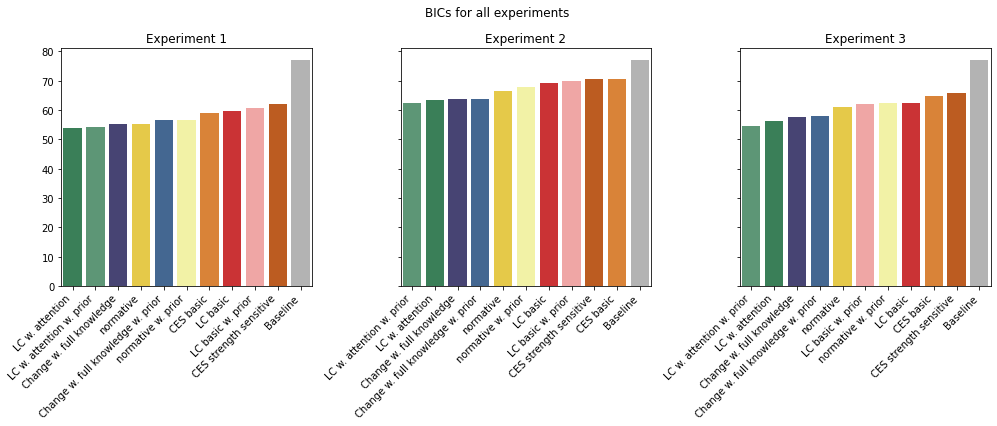

In [9]:

fig, axs = plt.subplots(1, len(experiments), figsize=(14, 6), sharey=True)

for i, experiment in enumerate(experiments):
    df_exp = df_bic[df_bic.experiment == experiment]
    df_exp_plot = df_exp[[col for col in df_exp.columns if col != 'experiment']]
    df_exp_plot = df_exp_plot[df_exp_plot.mean().sort_values().index]

    colors = gen_colors(df_exp_plot.columns, color_dict)
    sns.set_palette(colors)
    sns.barplot(data=df_exp_plot, ax=axs[i], ci=None)
    axs[i].set_xticklabels(df_exp_plot.columns, rotation=45, ha='right')
    axs[i].set_title(f'Experiment {experiment[-1]}')

fig.suptitle('BICs for all experiments')
plt.tight_layout()
plt.show()

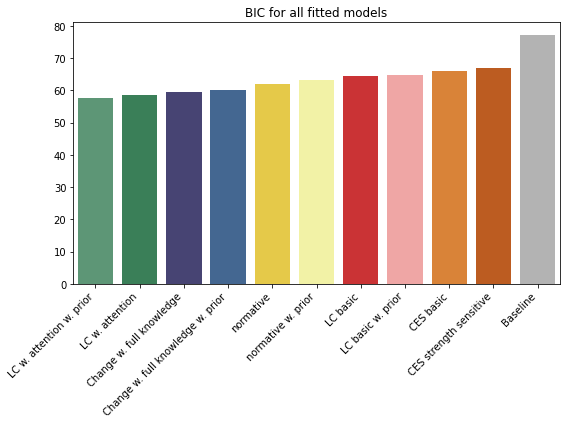

In [10]:
df_bic_plot = df_bic[[col for col in df_bic.columns if col != 'experiment']]
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

colors = gen_colors(df_bic_plot.columns, color_dict)
sns.set_palette(colors)

sns.barplot(data=df_bic_plot, ax=ax, ci=None)
ax.set_xticklabels(df_bic_plot.columns, rotation=45, ha='right')
ax.set_title('BIC for all fitted models')
plt.tight_layout()
plt.show()

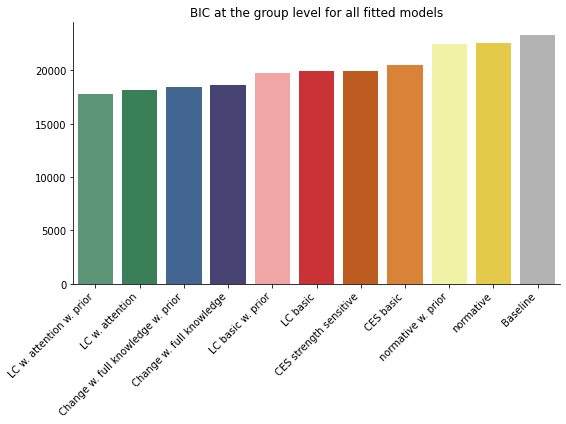

In [11]:
df_bic_group = df_group[['model_name', 'bic']].set_index('model_name').T
df_bic_group = df_bic_group[df_bic_group.T.bic.sort_values().index].reset_index(drop=True)
df_bic_group['Baseline'] = baseline_group

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

colors = gen_colors(labels=df_bic_group.columns, color_dict=color_dict)
sns.set_palette(colors)
sns.barplot(data=df_bic_group, ax=ax)

ax.set_xticklabels(df_bic_group.columns, rotation=45, ha='right')
ax.set_title('BIC at the group level for all fitted models')
ax.set_xlabel('')
sns.despine(ax=ax)
plt.tight_layout()
plt.show()
#df_bic_group.loc[len(df_bic_group.index)] = df_bic_group.loc[0]



In [42]:
select_all = [
    'LC w. attention',
    'LC w. attention w. prior',
    'Change w. full knowledge',
    'Change w. full knowledge w. prior',
    'normative',
    'normative w. prior',
    'LC basic',
    'LC basic w. prior',
    'CES_strength_sensitive',
    'Baseline'
]
select_lc_attention = [
    'LC w. attention',
    'LC w. attention w. prior',
    'Baseline'
]
select_lc = [
    'LC basic',
    'LC basic w. prior',
    'Baseline'
]
select_change = [
    'Change w. full knowledge',
    'Change w. full knowledge w. prior',
    'Change linear cause effect',
    'Change linear cause'
    'Baseline'
]
select_normative = [
    'normative',
    'normative w. prior',
    'Baseline'
]
select_ces = [
    'CES_strength_sensitive',
    'Baseline'
]

selections = {
    'select_all' : [
        'LC w. attention w. prior',
        'LC w. attention',
        'Change w. full knowledge',
        'Change w. full knowledge w. prior',
        'normative',
        'normative w. prior',
        'LC basic',
        'LC basic w. prior',
        'CES basic',
        'CES strength sensitive',
        'Baseline'
    ],
    'select_best' : [
        'LC w. attention w. prior',
        'Change w. full knowledge',
        'normative',
        'LC basic',
        'CES strength sensitive',
        'Baseline'
    ],
    'select_lc_attention' : [
        'LC w. attention',
        'LC w. attention w. prior',
        'Baseline'
    ],
    'select_lc' : [
        'LC basic',
        'LC basic w. prior',
        'Baseline'
    ],
    #'select_change' : [
    #    'Change w. full knowledge',
    #    'Change linear cause effect',
    #    'Change linear cause',
    #    'Baseline'
    #],
    'select_change_prior' : [
        'Change w. full knowledge',
        'Change w. full knowledge w. prior',
        'Baseline'
    ],
    'select_normative' : [
        'normative',
        'normative w. prior',
        'Baseline'
    ],
    'select_ces' : [
        'CES strength sensitive',
        'CES basic',
        'Baseline'
    ]
}

selections_titles = [
    'Local computations attention models prior comparison',
    'Local computations basic models prior comparison',
    'Change models prior comparison',
    'Normative models prior comparison',
    'Causal event segmentation models comparison'
]

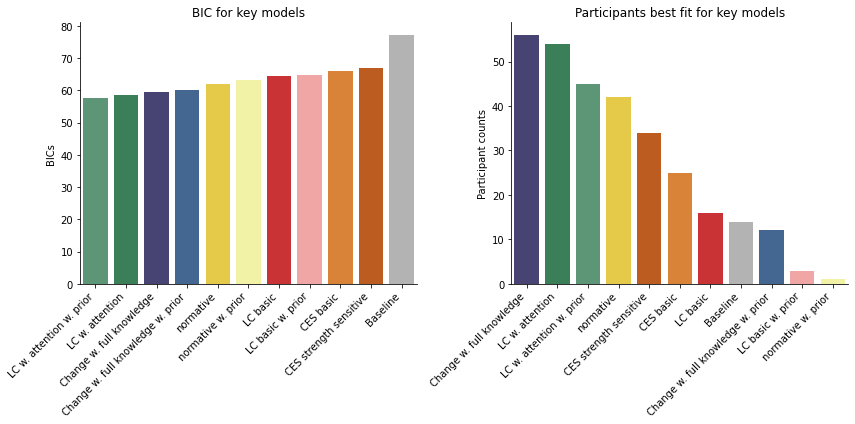

In [78]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
select = 'select_all'

# BICS
df_bic_plot = df_bic[[col for col in df_bic.columns if col not in ['experiment', 'best']]][selections[select]]

colors = gen_colors(df_bic_plot.columns, color_dict)
sns.set_palette(colors)

sns.barplot(data=df_bic_plot, ax=axs[0], ci=None)
axs[0].set_xticklabels(df_bic_plot.columns, rotation=45, ha='right')
axs[0].set_title('BIC for key models')

axs[0].set_ylabel('BICs')

# Participants' best fit

df_bic['best'] = df_bic[selections[select]].apply(lambda x: np.argmin(x), axis=1)
df_bic['best'] = df_bic['best'].replace(np.arange(len(selections[select])), selections[select])

df_bic_plot = df_bic[['best', 'experiment']]

df_order = pd.DataFrame(index=selections[select])
df_order['counts'] = 0
df_order.loc[df_bic_plot.best.value_counts().index, 'counts'] = df_bic_plot.best.value_counts().values

colors = gen_colors(df_order.counts.sort_values(ascending=False).index, color_dict)
sns.set_palette(colors)

sns.countplot(x='best', data=df_bic_plot, order=df_order.counts.sort_values(ascending=False).index, ax=axs[1])

axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')
axs[1].set_xlabel('')

axs[1].set_title('Participants best fit for key models')

axs[1].set_ylabel('Participant counts')

sns.despine()
plt.tight_layout()
plt.show()

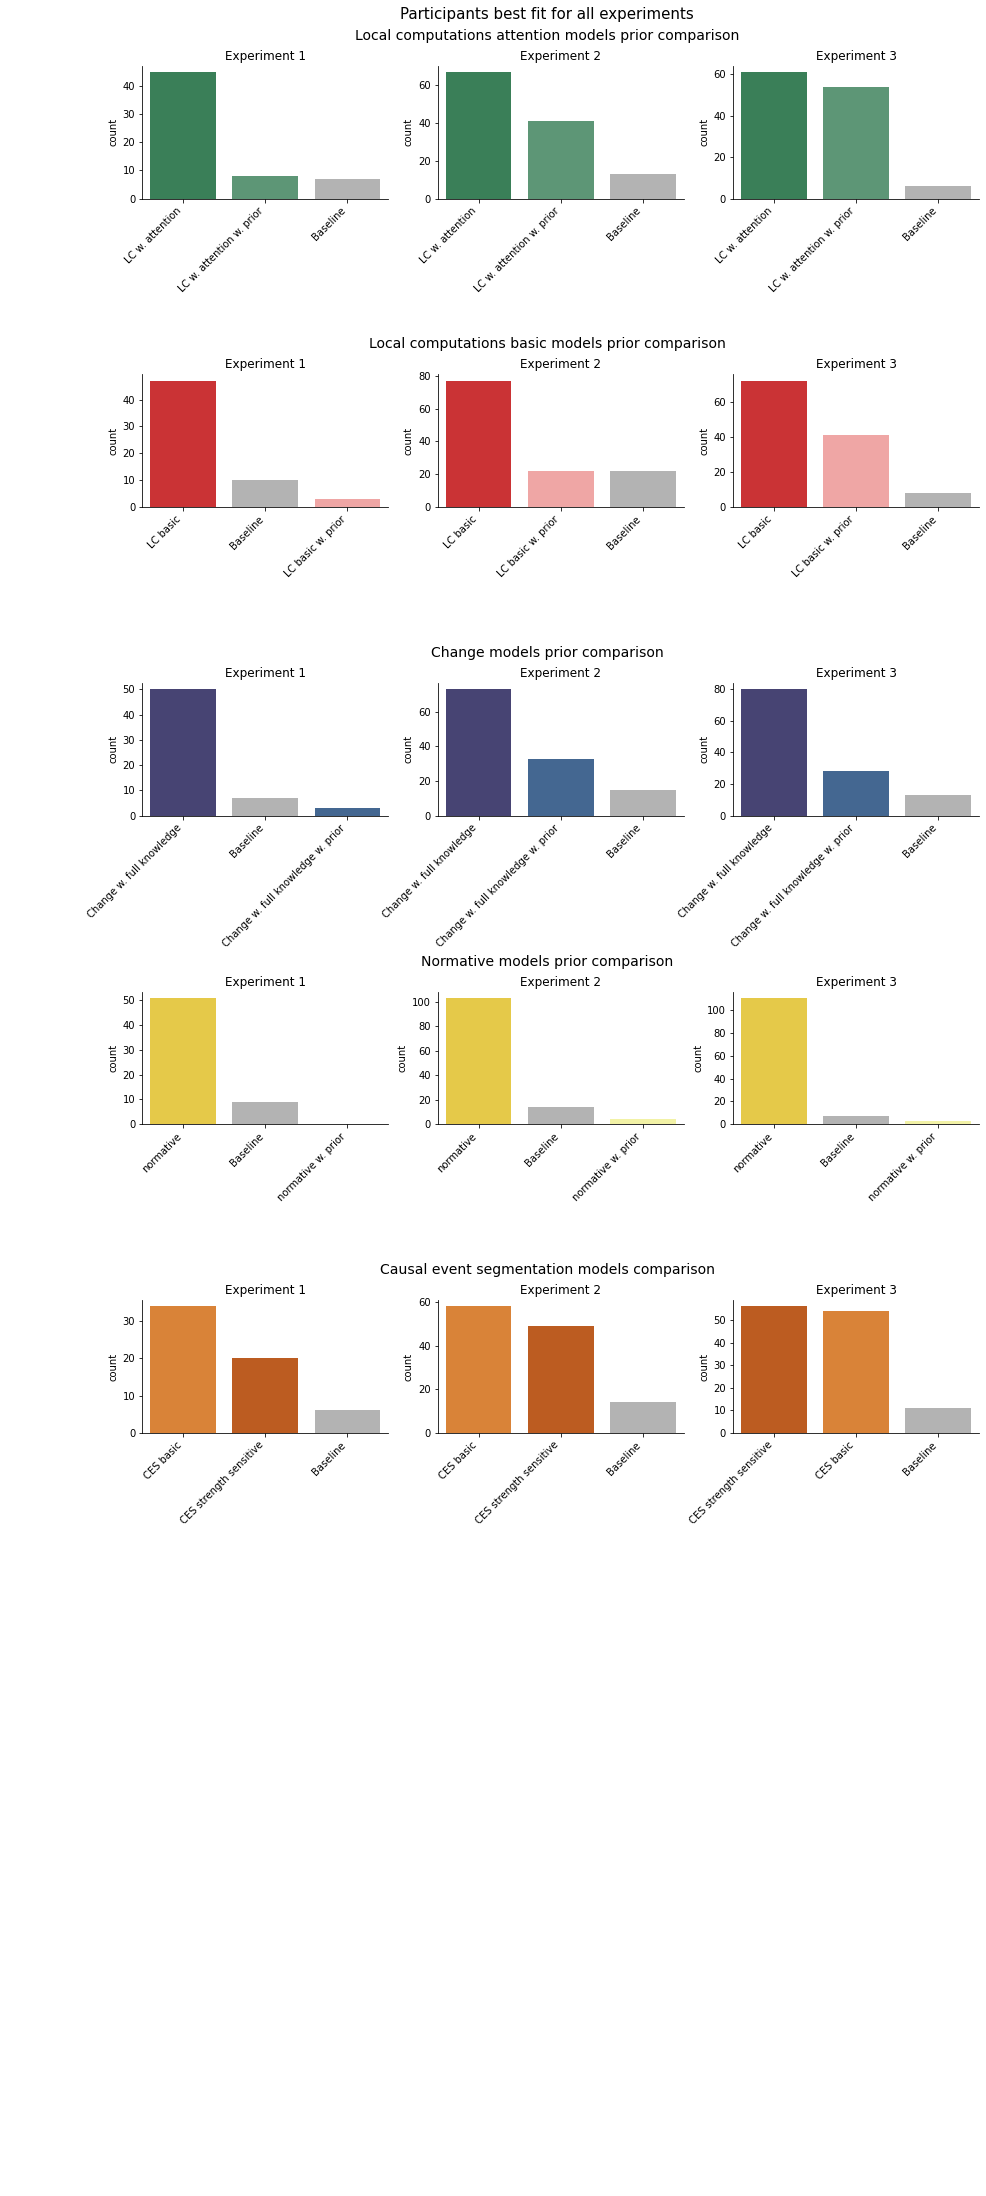

In [31]:
#fig, axs = plt.subplots(len(selections), len(experiments), figsize=(15, 30))


fig = plt.figure(figsize=(15, 30))

subfigs = fig.subfigures(nrows=len(selections), ncols=1)
local_selections = [select for select in selections.keys() if select not in ['select_all', 'select_best']]
for i, select in enumerate(local_selections):
    subfigs[i].suptitle(f'{selections_titles[i]}', y=1, fontsize=14)

    axs = subfigs[i].subplots(nrows=1, ncols=len(experiments))
    
    df_bic['best'] = df_bic[selections[select]].apply(lambda x: np.argmin(x), axis=1)
    df_bic['best'] = df_bic['best'].replace(np.arange(len(selections[select])), selections[select])

    subfigs[i].subplots_adjust(left=None, bottom=0.45, right=None, top=None, wspace=None, hspace=None)
    
    for j, experiment in enumerate(experiments):
        df_exp = df_bic[df_bic.experiment == experiment]
        df_exp_plot = df_exp[['best', 'experiment']]

        df_order = pd.DataFrame(index=selections[select])
        df_order['counts'] = 0
        df_order.loc[df_exp_plot.best.value_counts().index, 'counts'] = df_exp_plot.best.value_counts().values

        colors = gen_colors(df_order.counts.sort_values(ascending=False).index, color_dict)
        sns.set_palette(colors)

        sns.countplot(x='best', data=df_exp_plot, order=df_order.counts.sort_values(ascending=False).index, ax=axs[j])
        axs[j].set_xticklabels(axs[j].get_xticklabels(), rotation=45, ha='right')
        axs[j].set_xlabel('')
        axs[j].set_title(f'Experiment {experiment[-1]}')
        
        sns.despine(ax=axs[j])

fig.suptitle('Participants best fit for all experiments', fontsize=15, y=1.01)
#plt.tight_layout()
plt.show()

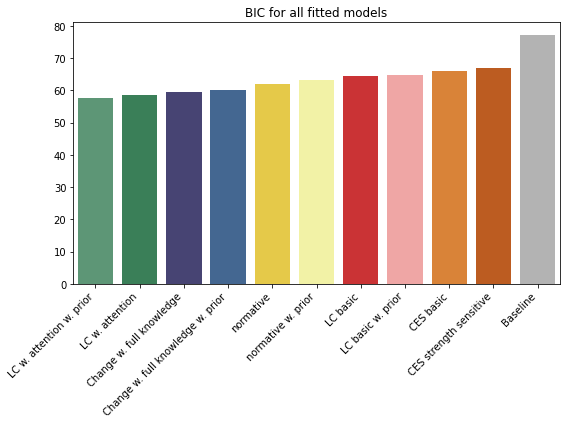

In [41]:
df_bic_plot = df_bic[[col for col in df_bic.columns if col not in ['experiment', 'best']]]
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

colors = gen_colors(df_bic_plot.columns, color_dict)
sns.set_palette(colors)

sns.barplot(data=df_bic_plot, ax=ax, ci=None)
ax.set_xticklabels(df_bic_plot.columns, rotation=45, ha='right')
ax.set_title('BIC for all fitted models')
plt.tight_layout()
plt.show()

### Build table

- Columns: BIC group, parameters, BIC participant, participant best fit
- Index models

In [47]:
df_group

,pid,experiment,num_trials,model_name,nLL,bic,params,params_labels,success,message,time,tag,folder
0,NaN,"['experiment_1', 'experiment_2', 'experiment_3']",NaN,LC w. attention,9075.064500,18164.314147,[1.83151202 0.45661586],"[['smoothing', 0], ['decay_rate', 1]]",True,Optimization terminated successfully.,182.188640,att,LC_discrete_attention
1,NaN,"['experiment_1', 'experiment_2', 'experiment_3']",NaN,LC w. attention w. prior,8888.912758,17799.103237,[ 1.84362866 0.61732498 160.70682808],"[['smoothing', 0], ['decay_rate', 1], ['prior_...",True,Optimization terminated successfully.,176.230751,att_prior,LC_discrete_attention
2,NaN,"['experiment_1', 'experiment_2', 'experiment_3']",NaN,Change w. full knowledge,9290.135922,18601.549565,[1.94835896 0.34538549 0.31420306],"[['smoothing', 0], ['decay_rate', 1], ['change...",True,Optimization terminated successfully.,182.267259,att_cha,change_d_obs_fk
3,NaN,"['experiment_1', 'experiment_2', 'experiment_3']",NaN,Change w. full knowledge w. prior,9191.242190,18410.854675,[1.97845059e+00 5.57812918e-02 3.14187793e-01 ...,"[['smoothing', 0], ['decay_rate', 1], ['prior_...",True,Optimization terminated successfully.,417.315985,att_cha_prior,change_d_obs_fk
4,NaN,"['experiment_1', 'experiment_2', 'experiment_3']",NaN,LC basic,9956.397833,19926.980813,[1.40852588],"[['smoothing', 0]]",True,Optimization terminated successfully.,264.161359,1,LC_discrete
5,NaN,"['experiment_1', 'experiment_2', 'experiment_3']",NaN,LC basic w. prior,9876.454406,19767.093959,[ 1.41283668 428.57928333],"[['smoothing', 0], ['prior_param', 1]]",True,Optimization terminated successfully.,284.159433,prior,LC_discrete
6,NaN,"['experiment_1', 'experiment_2', 'experiment_3']",NaN,normative,11283.764900,22581.714947,[6.7734243],"[['smoothing', 0]]",True,Optimization terminated successfully.,182.188640,1,normative
7,NaN,"['experiment_1', 'experiment_2', 'experiment_3']",NaN,normative w. prior,11247.295600,22508.776347,[6.76289508 352.40342092],"[['smoothing', 0], ['prior_param', 1]]",True,Optimization terminated successfully.,182.188640,prior,normative
8,NaN,"['experiment_1', 'experiment_2', 'experiment_3']",NaN,CES strength sensitive,9982.875254,19987.028229,[ 0.63510598 47.26938265 0.48865833],"[['ce_threshold', 0], ['time_threshold', 1], [...",True,Optimization terminated successfully.,127.681534,str_guess,ces_strength
9,NaN,"['experiment_1', 'experiment_2', 'experiment_3']",NaN,CES basic,10268.207080,20550.599307,[0.62191559 0.51979314],"[['ce_threshold', 0], ['guess', 1]]",True,Optimization terminated successfully.,41.452631,guess,ces_no_strength


In [73]:
df_params = pd.DataFrame()

for i in df_group.index:
    if df_group.loc[i, 'model_name'] != 'Baseline':
        params_str = " ".join(df_group.loc[i, 'params'][1:-1].split()).split(' ')
    
        params, indices = zip(*literal_eval(df_group.loc[i, 'params_labels']))

        for j, idx in enumerate(indices):
            df_params.loc[df_group.loc[i, 'model_name'], params[j]] = float(params_str[idx])


df_params

dict_param_labels = {
    'smoothing': 'Tau',
    'decay_rate': 'Attention',
    'change_memory': 'Change memory',
    'prior_param': 'Tau Prior',
    'ce_threshold': 'CE threshold',
    'time_threshold': 'Strength threshold',
    'guess': 'Guess'
}

df_params = df_params.rename(dict_param_labels, axis=1)
df_params.loc['Baseline',:] = np.nan

In [74]:
df_params

,Tau,Attention,Tau Prior,Change memory,CE threshold,Strength threshold,Guess
LC w. attention,1.831512,0.456616,NaN,NaN,NaN,NaN,NaN
LC w. attention w. prior,1.843629,0.617325,160.706828,NaN,NaN,NaN,NaN
Change w. full knowledge,1.948359,0.345385,NaN,0.314203,NaN,NaN,NaN
Change w. full knowledge w. prior,1.978451,0.055781,309.017044,0.314188,NaN,NaN,NaN
LC basic,1.408526,NaN,NaN,NaN,NaN,NaN,NaN
LC basic w. prior,1.412837,NaN,428.579283,NaN,NaN,NaN,NaN
normative,6.773424,NaN,NaN,NaN,NaN,NaN,NaN
normative w. prior,6.762895,NaN,352.403421,NaN,NaN,NaN,NaN
CES strength sensitive,NaN,NaN,NaN,NaN,0.635106,47.269383,0.488658
CES basic,NaN,NaN,NaN,NaN,0.621916,NaN,0.519793


In [85]:
cols = ['BIC group', 'Tau', 'Attention', 'Change memory', 'Tau Prior', 'CE threshold', 'Strength threshold', 'Guess', 'BIC ind.', 'Participants best fit']
df_table = pd.DataFrame(index=df_group.model_name, columns=cols)

df_table['BIC group'] = df_group.bic.round(2).to_list()
df_table['BIC ind.'] = df_bic[df_table.index].mean().round(2).to_list()

#df_bic.best.value_counts()
df_table[df_params.columns] = df_params.to_numpy()

df_table.loc[df_order.counts.sort_values(ascending=False).index, 'Participants best fit'] = df_order.counts.sort_values(ascending=False).to_list()

df_table.sort_values('BIC group')

df_table.to_csv('./data/final_outputs/bic_table.csv')

In [84]:
df_table.shape

(11, 10)